<h1>Búsqueda No Informada y Heurística</h1>
<p>
    En general, un problema de búsqueda se compone de:
    <ul>
        <li>Un nodo inicial</li>
        <li>Una función que devuelve los hijos del nodo</li>
        <li>Una función que booleana que devuelve TRUE si el nodo es uno de los objetivos</li>
        <li>Una función que devuelve la heurística del nodo</li>
    </ul>
</p>
La siguiente función provee una clase abstracta para un problema de búsqueda

In [1]:
class generic_edge(object):
    
    def __init__(self,_parent_node,_child_node,_weight):
        self.parent=_parent_node
        self._child=_child_node
        self.cost=_weight
    

class generic_search_problem(object):
    
    def start_node(self):
        raise NotImplementedError("start_node")
        
    def is_goal(self,node):
        raise NotImplementedError("is_goal")

    def get_children(self,node):
        raise NotImplementedError("get_children")
    
    def search(self):
        raise NotImplementedError("search")


Por ejemplo, si podemos representar el siguiente grafo de búsqueda:


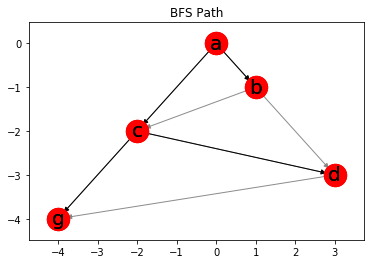

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
G.add_edge('a', 'b',weight=1)
G.add_edge('b', 'c',weight=1)
G.add_edge('c', 'd',weight=1)
G.add_edge('d', 'g',weight=1)
G.add_edge('a', 'c',weight=3)
G.add_edge('b', 'd',weight=3)
G.add_edge('c', 'g',weight=3)
#pos = nx.spring_layout(G, iterations=200)
tree=nx.bfs_tree(G,'a')
#G=nx.grid_2d_graph(1,2)  #4x4 grid
pos = {'a':(0,0),'b':(1,-1),'c':(-2,-2),'d':(3,-3),'g':(-4,-4)}
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.9)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='red')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.title('Graph')

nx.draw_networkx_edges(tree, pos)
nx.draw_networkx_nodes(tree, pos, node_size=500, node_color='red')
nx.draw_networkx_labels(tree, pos, font_size=20, font_family='sans-serif')
plt.title('BFS Path')

plt.show()


In [6]:
class bfs_search(generic_search_problem):
    
    def __init__(self,_edges,_start,_goal):
        self.edges=_edges
        self.nodes={a for a,b in self.edges} | {b for a,b in self.edges}
        self.start=_start
        self.goal=_goal
        self.visited=[]
        self.frontier=[self.start]
    
    def start_node(self):
        return self.start_node
        
    def is_goal(self,node):
        return node==self.goal

    def get_children(self,node):
        return {b for a,b in self.edges if a==node}
    
    def search(self):
        new_node=self.frontier.pop(0)
        while (not self.is_goal(new_node)):
            self.visited.append(new_node)
            print '--------------------'
            print 'visited : ',self.visited
            self.frontier=self.frontier+list(self.get_children(new_node)-set(self.visited)-set(self.frontier))
            print 'frontier : ',self.frontier
            new_node=self.frontier.pop(0)

In [4]:
E={('a', 'b'),('a', 'c'),('b', 'c'),('c', 'd'),('b', 'd'),('d', 'g'),('c', 'g')}
bfs=bfs_search(E,'a','g')
print bfs.is_goal('a')
print bfs.get_children('a')
bfs.search()

False
set(['c', 'b'])
--------------------
visited :  ['a']
frontier :  ['c', 'b']
--------------------
visited :  ['a', 'c']
frontier :  ['b', 'd', 'g']
--------------------
visited :  ['a', 'c', 'b']
frontier :  ['d', 'g']
--------------------
visited :  ['a', 'c', 'b', 'd']
frontier :  ['g']


<h2>Búsqueda Heurística</h2>
A diferencia de la búqueda no informada, la estrategia de búsqueda denominada best-first es un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)$ en cada momento.

In [5]:
from heapq import heappush,heappop

class bestfirst_search(generic_search_problem):
    
    def __init__(self,_edges,_heuristic,_start,_goal):
        self.edges=_edges
        self.heuristic=_heuristic
        self.nodes={a for a,b in self.edges} | {b for a,b in self.edges}
        self.start=_start
        self.goal=_goal
        self.visited=[]
        self.frontier=[]
        heappush(self.frontier,(0,self.start))
    
    def start_node(self):
        return self.start_node
        
    def is_goal(self,node):
        return node==self.goal

    def get_children(self,node):
        return {b for a,b in self.edges if a==node}
    
    def search(self):
        p,new_node=heappop(self.frontier)
        while (not self.is_goal(new_node)):
            self.visited.append(new_node)
            print '--------------------'
            print 'visited : ',self.visited
            new_nodes=self.get_children(new_node)-set(self.visited)-{n for h,n in self.frontier}
            print {n for h,n in self.frontier}
            for node in new_nodes:
                heappush(self.frontier,(self.heuristic[node],node))
            print 'frontier : ',self.frontier
            p,new_node=heappop(self.frontier)


In [6]:
E={('a', 'b'),('a', 'c'),('b', 'c'),('c', 'd'),('b', 'd'),('d', 'g'),('c', 'g')}
H={'a':0,'b':3,'c':2,'d':1,'g':0}
bs=bestfirst_search(E,H,'a','g')
bs.search()

--------------------
visited :  ['a']
frontier :  [(2, 'c'), (3, 'b')]
--------------------
visited :  ['a', 'c']
frontier :  [(0, 'g'), (3, 'b'), (1, 'd')]


la estrategia de búsqueda A* es también un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo así como también el costo acumulado $g(n)$ de llegar hacia $n$. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)+g(n)$ en cada momento.

In [7]:
E={('a', 'b'):1,('a', 'c'):3,('b', 'c'):1,('c', 'd'):1,('b', 'd'):3,('d', 'g'):1,('c', 'g'):3}
H={'a':0,'b':3,'c':2,'d':1,'g':0}

In [8]:
# Tarea implementar A* para incorporar el costo acumulado

from heapq import heappush,heappop

class astar_search(generic_search_problem):
    
    def __init__(self,_edges,_heuristic,_start,_goal):
        pass
    
    def start_node(self):
        pass
    
    def is_goal(self,node):
        pass
        
    def get_children(self,node):
        pass
        
    def search(self):
        pass
        


<h1>Implementación Puzzle 8</h1>
<p>
El problema del 8-puzzle fue inventado en 1870 y se juega en una grilla de 3x3 con 9 bloques cuadrados. Cada bloque tiene una etiqueta con un número del 1 al 8 y existe un espacio en blanco en el cual el jugador puede mover un bloque adyacente.   
</p>
    

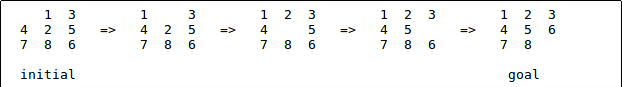

In [9]:
from IPython.display import Image
Image(filename='../figures/8_puzzle.png') 
    

<p>
Cada estado del puzzle puede ser visto como un vértice de un grafo tipo árbol, cuyo nodo raiz es el estado inicial del puzzle. Las estrategias de búsqueda no-informada no utilizan ningún criterio para ponderar las soluciones y por ende dependen en gran medida de la complejidad del problema.</p>
<p>
<ul>
<li>
De modo de diseñar algoritmos ''inteligentes'', es necesario reducir el espacio de b{usqueda y concentrarse en los estados que sean  atractivos.
</li>
<li>
Dado la alta complejidad de los problemas, no es posible recorrer todos los caminos y por lo tanto solo podemos evaluar estados que sean potencialmente atractivos.
<li>
La estrategia de búsqueda A* utiliza una combinación de búsqueda local:
</li>

\begin{align}
f(n)=g(n)+h(n)
\end{align}

Donde $g(n)$ corresponde al costo de la ruta desde el nodo inicial al nodo $n$ y $h(n)$ es el costo estimado (cota inferior) desde $n$ hasta el nodo objetivo.
</ul>

Para el problema del puzzle, utlizamos las siguientes heurísticas:

<ul>
<li>
Distancia Hamming : Número de bloques en la posición incorrecta.
</li>
<li>
Distancia Manhattan : Suma de las distancias (suma de la distancia horizontal y vertical) desde el bloque hasta la posición objetivo ($d_M=\vert X_n-X_g \vert + \vert Y_n-Y_g \vert$).
</li>


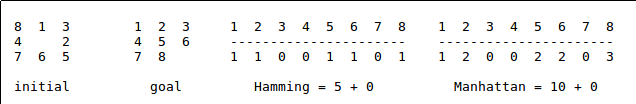

In [10]:
from IPython.display import Image
Image(filename='../figures/8_puzzle_distancias.png') 

In [6]:
from heapq import heappush,heappop
import numpy as np

class puzzle(object):
    
    def __init__(self,node):
        self.state=node
        
    def __hash__(self):
        return hash(np.array_str(self.state.ravel()))
        
    def __eq__(self,other):
        return np.array_equal(other.state,self.state)

    def manhattan(self,goal):
        dim=self.state.shape[0]
        diff_mat=np.zeros((dim,dim))
        for i in range(dim):
            for j in range(dim):
                if goal.state[i,j]!=0:
                    u,v=map(np.int,np.where(self.state==goal.state[i,j]))
                    diff_mat[i,j]=abs(i-u)+abs(j-v)
        return int(diff_mat.sum())

    def hamming(self,goal):
        dim=self.state.shape[0]
        diff_mat=np.zeros((dim,dim))
        diff_mat=self.state!=goal.state
        dist=np.sum(diff_mat.astype(int).ravel())
        if dist>0:
            dist=dist-1
        return dist
   
    def pretty_print(self):
        return np.array_str(self.state.ravel())
 
    def solvable(self):
        return len([(a,b) for i,a in enumerate(self.state.ravel()) for b in self.state.ravel()[i:] if a>b & b!=0])%2==0
    
    def my_heuristic(self,alpha=2):
        dim=self.state.shape[0]
        return alpha*((dim*dim-2)-len([(a,b) for i,a in enumerate(random_start.state.ravel()) for b in random_start.state.ravel()[i:i+2] if b==a+1]))
    
    
class bestfirst_puzzle(generic_search_problem):
    
    def __init__(self,_heuristic,_start,_goal):
        self.heuristic=_heuristic
        self.start=_start
        self.goal=_goal
        self.visited=set()
        self.frontier=[]
        heappush(self.frontier,(0,self.start))
        self.path_length=0
        self.frontier_length=0
    
    def start_node(self):
        return self.start_node
        
    def is_goal(self,node):
        return node==self.goal

    def get_children(self,node):
        child_list=set()
        dim=node.state.shape[0]
        i,j=map(np.int,np.where(node.state==0))
        #print i,j
        if (j>0):
            child=node.state.copy()
            child[i,j]=node.state[i,j-1]
            child[i,j-1]=0
            p=puzzle(child)
            child_list.add(p)
        if (j<dim-1):
            child=node.state.copy()
            child[i,j]=node.state[i,j+1]
            child[i,j+1]=0
            p=puzzle(child)
            child_list.add(p)
        if (i>0):
            child=node.state.copy()
            child[i,j]=node.state[i-1,j]
            child[i-1,j]=0
            p=puzzle(child)
            child_list.add(p)
        if (i<dim-1):
            child=node.state.copy()
            child[i,j]=node.state[i+1,j]
            child[i+1,j]=0
            p=puzzle(child)
            child_list.add(p)
        return child_list
    
    def search(self,verbose=False):
        p,new_node=heappop(self.frontier)
        while (not self.is_goal(new_node)):
            if verbose:
                print '--------------------'
                print "node: ",new_node.pretty_print(),",h:",new_node.hamming(goal),"hash:",hash(new_node)
            self.visited.add(new_node)
            self.path_length=len(self.visited)
            new_nodes=self.get_children(new_node)
            for node in new_nodes:
                if node not in self.visited:
                    if verbose:
                        print("child: ",node.pretty_print(),",h:",node.hamming(goal),"hash:",hash(node))
                    if self.heuristic=='hamming':
                        h=node.hamming(goal)
                        heappush(self.frontier,(h,node))
                    elif self.heuristic=='manhattan':
                        h=node.manhattan(goal)
                        heappush(self.frontier,(h,node))
            p,new_node=heappop(self.frontier)
            self.frontier_length=len(self.frontier)
        return (self.path_length,self.frontier_length)

In [11]:
# nodo inicial y objetivo
dim=3

goal=puzzle(np.insert(np.arange(1,dim*dim),dim*dim-1,0).reshape(dim,dim))

easy_start=puzzle(np.insert(np.arange(1,dim*dim),6,0).reshape(dim,dim))



print 'start',easy_start.state
print 'goal',goal.state
print 

bfs=bestfirst_puzzle(easy_start,easy_start,goal)
for child in bfs.get_children(easy_start):
    print child.state
    print 'Hamming Distance',easy_start.hamming(child)
    print 'Manhattan Distance',easy_start.manhattan(child)
    
while True:
    random_start=puzzle(np.random.permutation(np.arange(dim*dim)).reshape((dim,dim)))
    if random_start.solvable() : break
puzzle_solver_manhattan=bestfirst_puzzle('manhattan',random_start,goal)
(k,h)=puzzle_solver_manhattan.search(verbose=True)
print k,h
    

start [[1 2 3]
 [4 5 6]
 [0 7 8]]
goal [[1 2 3]
 [4 5 6]
 [7 8 0]]

[[1 2 3]
 [4 5 6]
 [7 0 8]]
Hamming Distance 1
Manhattan Distance 1
[[1 2 3]
 [0 5 6]
 [4 7 8]]
Hamming Distance 1
Manhattan Distance 1
--------------------
node:  [7 4 5 2 0 1 8 6 3] ,h: 8 hash: -2845742118290918723
('child: ', '[7 4 5 2 6 1 8 0 3]', ',h:', 8, 'hash:', -138942978633475507)
('child: ', '[7 4 5 0 2 1 8 6 3]', ',h:', 8, 'hash:', 7116682243227197325)
('child: ', '[7 0 5 2 4 1 8 6 3]', ',h:', 8, 'hash:', -8157330080859825571)
('child: ', '[7 4 5 2 1 0 8 6 3]', ',h:', 8, 'hash:', 3662332627570450245)
--------------------
node:  [7 4 5 2 6 1 8 0 3] ,h: 8 hash: -138942978633475507
('child: ', '[7 4 5 2 6 1 0 8 3]', ',h:', 7, 'hash:', -3193776168655555443)
('child: ', '[7 4 5 2 6 1 8 3 0]', ',h:', 7, 'hash:', -1138951978627475579)
--------------------
node:  [7 4 5 2 6 1 0 8 3] ,h: 7 hash: -3193776168655555443
('child: ', '[7 4 5 0 6 1 2 8 3]', ',h:', 7, 'hash:', 1806562652240634013)
--------------------
node:

node:  [1 3 0 4 6 2 7 8 5] ,h: 4 hash: -366472924416672947
('child: ', '[1 0 3 4 6 2 7 8 5]', ',h:', 3, 'hash:', 1381372055442530629)
--------------------
node:  [1 0 3 4 6 2 7 8 5] ,h: 3 hash: 1381372055442530629
('child: ', '[1 6 3 4 0 2 7 8 5]', ',h:', 3, 'hash:', 4167288752790225269)
('child: ', '[0 1 3 4 6 2 7 8 5]', ',h:', 4, 'hash:', 5434536280534536765)
--------------------
node:  [1 6 3 4 0 2 7 8 5] ,h: 3 hash: 4167288752790225269
('child: ', '[1 6 3 4 8 2 7 0 5]', ',h:', 4, 'hash:', 5032749841497035093)
('child: ', '[1 6 3 0 4 2 7 8 5]', ',h:', 4, 'hash:', 4012905899662747093)
--------------------
node:  [0 1 3 4 6 2 7 8 5] ,h: 4 hash: 5434536280534536765
('child: ', '[4 1 3 0 6 2 7 8 5]', ',h:', 5, 'hash:', 1836748127612459933)
--------------------
node:  [1 3 2 7 4 6 0 8 5] ,h: 5 hash: 6439501683260025333
('child: ', '[1 3 2 7 4 6 8 0 5]', ',h:', 6, 'hash:', -4261425978376693515)
--------------------
node:  [1 2 6 4 0 5 7 3 8] ,h: 4 hash: -720613730239768763
('child: ', '[1

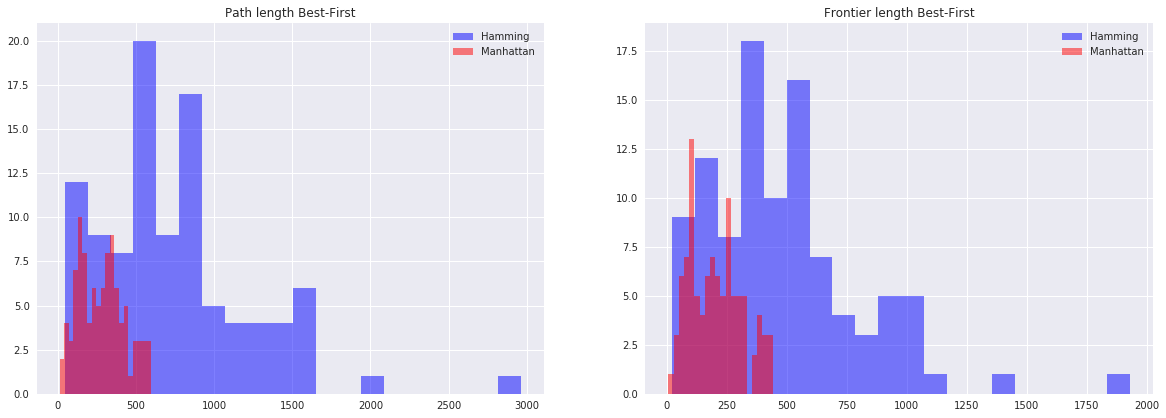

In [60]:
import seaborn as sns
sns.set(style="darkgrid")

hamming_path=[]
hamming_frontier=[]
manhattan_path=[]
manhattan_frontier=[]
for i in range(100):
    while True:
        random_start=puzzle(np.random.permutation(np.arange(dim*dim)).reshape((dim,dim)))
        if random_start.solvable() : break
    puzzle_solver_hamming=bestfirst_puzzle('hamming',random_start,goal)
    (i,j)=puzzle_solver_hamming.search()
    puzzle_solver_manhattan=bestfirst_puzzle('manhattan',random_start,goal)
    (k,h)=puzzle_solver_manhattan.search()
    hamming_path.append(i)
    hamming_frontier.append(j)
    manhattan_path.append(k)
    manhattan_frontier.append(h)
    

plt.figure(figsize=(20,15))
plt.plot([1,2,3])
plt.subplot(221)
plt.hist(hamming_path,bins=20 , histtype='stepfilled', color='b', alpha=0.5, label='Hamming')
plt.hist(manhattan_path,bins=20, histtype='stepfilled',  color='r', alpha=0.5, label='Manhattan') 
plt.title("Path length Best-First")
plt.legend()
plt.subplot(222)
plt.hist(hamming_frontier,bins=20, histtype='stepfilled',  color='b', alpha=0.5, label='Hamming') 
plt.hist(manhattan_frontier,bins=20, histtype='stepfilled', color='r', alpha=0.5, label='Manhattan') 
plt.title("Frontier length Best-First")
plt.legend()
plt.show()